In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


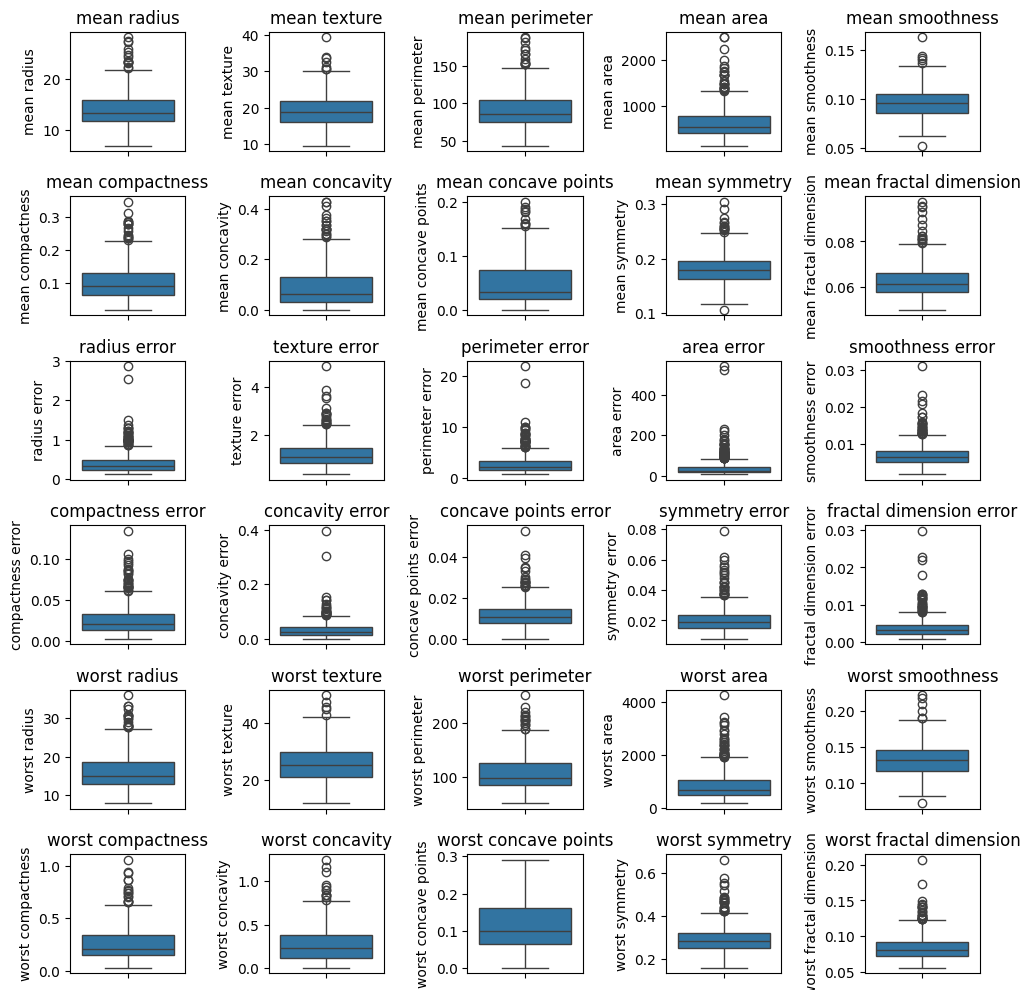

In [ ]:
# prompt: I want to plot box plot for my df as I want to find the outliers

# Create box plots for all features in the DataFrame
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
for i, column in enumerate(df.columns):
    plt.subplot(6, 5, i + 1)  # Adjust the subplot grid based on the number of features
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


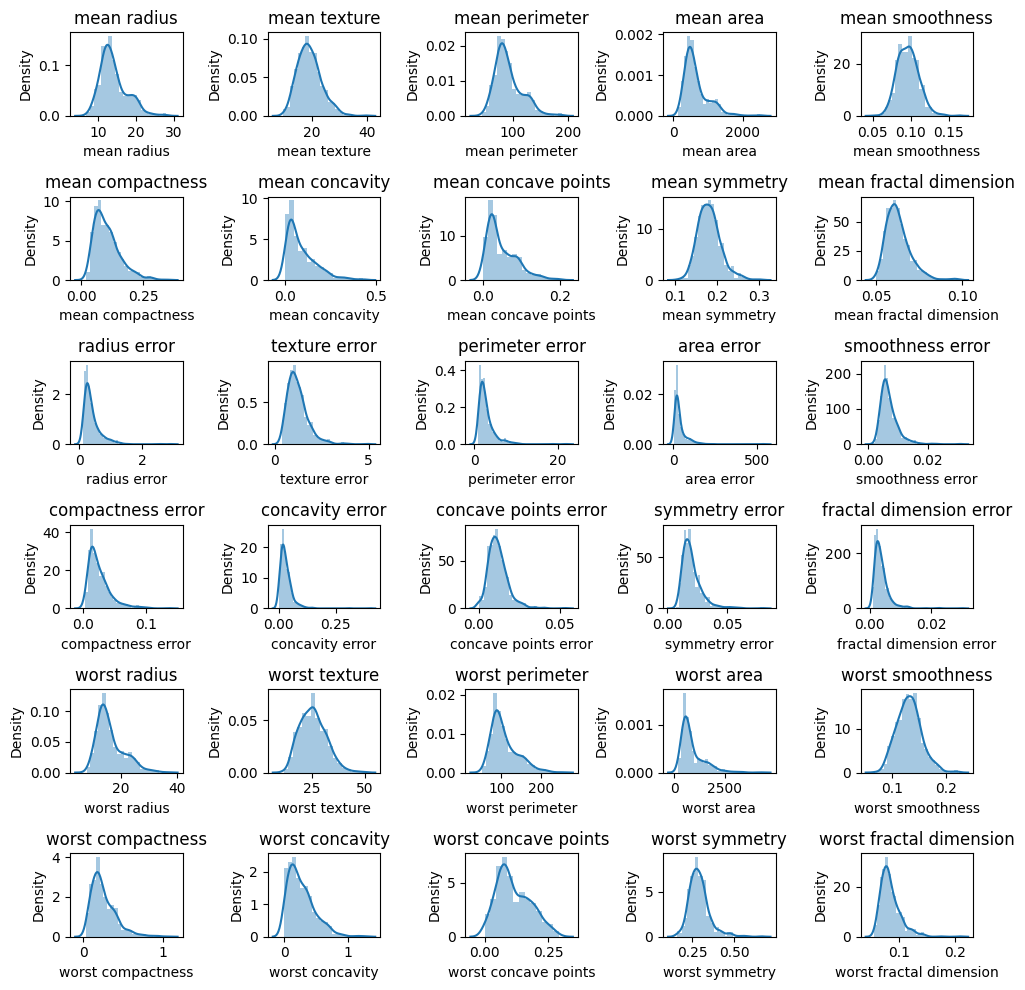

In [ ]:
# prompt: I want to now plot bell curve for my df

plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
for i, column in enumerate(df.columns):
    plt.subplot(6, 5, i + 1)  # Adjust the subplot grid based on the number of features
    sns.distplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

def cap_outliers_iqr(df, y):
    for column in df_capped.columns:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds
        df_capped[column] = np.clip(df_capped[column], lower_bound, upper_bound)

    return df_capped, y  # Return the capped DataFrame and original target variable

# Usage:
df_capped, y_capped = cap_outliers_iqr(df, cancer.target)

NameError: name 'df_capped' is not defined

In [ ]:
df_capped.shape

In [ ]:
X = df_capped
y = y_capped

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [ ]:
#earlier it was 52.6 when dropped the rows after finding the outliers but by clipping it's good

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
pip install gradio

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'logistic_regression_model.pkl')


In [ ]:
import gradio as gr
import joblib
import numpy as np

# Load the saved Logistic Regression model
model = joblib.load('logistic_regression_model.pkl')

# Define the function to make predictions
def predict(mean_radius, mean_texture, mean_perimeter):
    # Convert features to a 2D array since scikit-learn models expect 2D input
    features = np.array([mean_radius, mean_texture, mean_perimeter]).reshape(1, -1)

    # Predict using the model
    prediction = model.predict(features)

    # Return the prediction result
    return f"Predicted class: {prediction[0]}"

# Define the input components
inputs = [
    gr.Number(label="Mean Radius"),
    gr.Number(label="Mean Texture"),
    gr.Number(label="Mean Perimeter")  # Fixed label to match variable name
]

# Create the Gradio interface using the updated API
interface = gr.Interface(
    fn=predict,  # Function to call for prediction
    inputs=inputs,  # List of input fields
    outputs=gr.Textbox(label="Prediction"),  # Use Textbox for the output
    title="Logistic Regression Model Interface",
    description="Enter the feature values to get a class prediction."
)

# Launch the Gradio interface
interface.launch()
